In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

(640, 640)


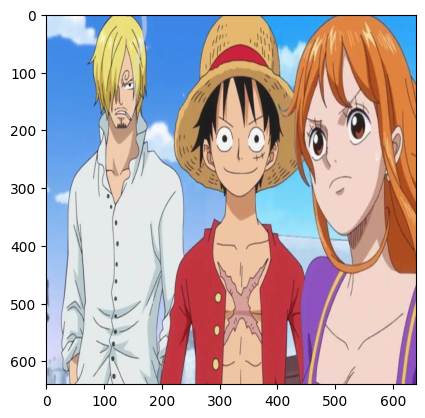

C:\Users\mario\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\mario\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


hh

0: 640x640 3 anime_faces, 13.1ms
Speed: 5.1ms preprocess, 13.1ms inference, 82.2ms postprocess per image at shape (1, 3, 640, 640)
{0: {'name': 'Luffy', 'bbox': [215.29785, 0.0, 450.78033, 316.59436], 'confidence': 100}, 1: {'name': 'Sanji', 'bbox': [76.916565, 0.14868164, 175.43758, 197.85864], 'confidence': 100}, 2: {'name': 'Nami', 'bbox': [417.28345, 0.11804199, 638.6105, 379.4662], 'confidence': 100}}


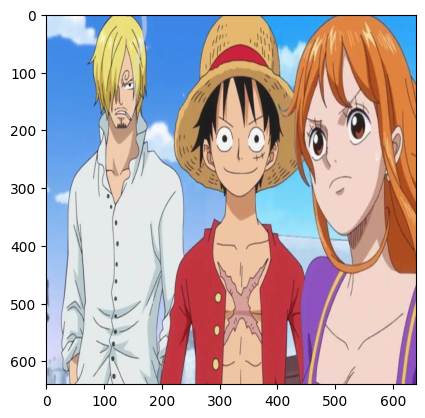

In [3]:
img = Image.open("samples/1.jpg")
print(img.size)
plt.imshow(img)
plt.show()

from Model import Model

md = Model()

res = md.predict(img)
print(res)

In [33]:
from ultralytics import YOLO
from torchvision import models
import os
import torch.nn as nn

models_path = os.path.join(os.getcwd(),"models")
model_detect_path = os.path.join(models_path,"best.pt")
model_classify_path = os.path.join(models_path,"mobilenet_v1_one_piece.pth")

model_face_detect = YOLO(model_detect_path)
model_classify_face = models.mobilenet_v2(pretrained=True)
model_classify_face.classifier[1] = nn.Linear(model_classify_face.classifier[1].in_features, 18)
model_classify_face.load_state_dict(torch.load(model_classify_path))
model_classify_face.eval()


C:\Users\mario\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\mario\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [7]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize input images to the required size for VGG
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize input images
])


In [30]:
class_names = ['Ace',
 'Akainu',
 'Brook',
 'Chopper',
 'Crocodile',
 'Franky',
 'Jimbei',
 'Kurohige',
 'Law',
 'Luffy',
 'Mihawk',
 'Nami',
 'Rayleigh',
 'Robin',
 'Sanji',
 'Shanks',
 'Usopp',
 'Zoro']
class_names = sorted(class_names)
idx2label = {}
for i in range(len(class_names)):
    
    idx2label[i]=class_names[i]

idx2label

{0: 'Ace',
 1: 'Akainu',
 2: 'Brook',
 3: 'Chopper',
 4: 'Crocodile',
 5: 'Franky',
 6: 'Jimbei',
 7: 'Kurohige',
 8: 'Law',
 9: 'Luffy',
 10: 'Mihawk',
 11: 'Nami',
 12: 'Rayleigh',
 13: 'Robin',
 14: 'Sanji',
 15: 'Shanks',
 16: 'Usopp',
 17: 'Zoro'}

In [34]:
from matplotlib.patches import Rectangle

def predict(img):

    Res = model_face_detect(img)

    # Plot the image
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    # img = Image.fromarray(img)
    # Iterate over each prediction result
    for res in Res:
        boxes = res.boxes.xyxy.cpu().numpy()
        confidences = res.boxes.conf.cpu().numpy()

        for i in range(len(boxes)):
            x, y, x_max, y_max = boxes[i]
            confidence = confidences[i]
            # print((x,x_max,y,y_max))
            face_img = img.crop((x,y,x_max,y_max))
            
            face_img = preprocess(face_img)
            
            
            with torch.no_grad():
                face_pred = model_classify_face(face_img)
            # if label!="scale_4":
            #     continue
            # label = res.names[int(res.boxes.cls[i].cpu().numpy())]
            _, predicted_idx = torch.max(face_pred, 1)
            label = idx2label[predicted_idx.item()]
            
            rect = Rectangle((x, y), x_max - x, y_max - y, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.text(x, y, f"{label} {confidence*100:.2f}%", color='r', fontsize=8, backgroundcolor='white')
    plt.axis('off')
    plt.show()

def preprocess(img):

    img = transform(img)
    img = img.unsqueeze(0) 
    return img


0: 640x640 5 anime_faces, 185.5ms
Speed: 5.5ms preprocess, 185.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


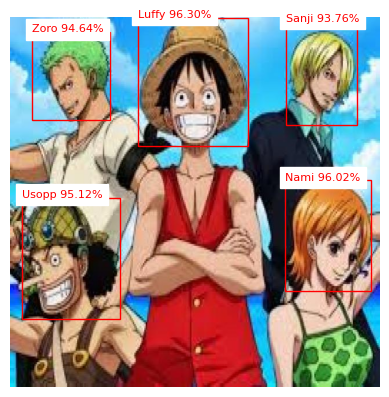

In [39]:
img = Image.open("samples/4.jpg")
predict(img)